<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/Machine-Learning-Projects/Emisiones_CO2_paises_industrias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [45]:
df = pd.read_csv("/content/Co2_Emissions_by_Sectors.csv")
df

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17681,Manufacturing,Asia,South Africa,2020,177.73,132.27,32.44,90.00,49.83,10.25,849.67,22734.11,62.10,24.19,-8.38,5.79
17682,Energy,Africa,Germany,2009,11.89,615.87,71.90,122.81,3.05,1.50,581.74,14655.12,21.78,29.93,11.33,9.92
17683,Mining,South America,Canada,2017,47.94,564.24,32.63,47.54,47.54,15.02,898.74,16334.18,87.90,55.32,11.33,4.51
17684,Energy,Europe,USA,2012,211.15,826.48,36.02,122.83,19.24,15.82,28.58,20961.68,84.39,51.29,12.82,4.89


In [47]:
df.columns

Index(['Industry_Type', 'Region', 'Country', 'Year',
       'Co2_Emissions_MetricTons', 'Energy_Consumption_TWh',
       'Automobile_Co2_Emissions_MetricTons',
       'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons',
       'Domestic_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage',
       'Transport_Growth_Percentage'],
      dtype='object')

In [46]:
df.describe()

,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,2011.024935,150.331667,500.071501,49.983267,99.975617,24.895109,10.170034,752.966182,12522.789595,60.039285,49.916005,2.570492,2.471663
std,6.657483,86.401588,287.008603,28.936346,57.630602,14.422553,5.757755,432.819846,7184.289404,23.131004,28.962171,7.229444,4.338840
min,2000.000000,0.500000,0.630000,0.110000,0.110000,0.100000,0.100000,0.510000,0.220000,20.010000,0.000000,-10.000000,-5.000000
25%,2005.000000,75.580000,252.447500,24.712500,49.550000,12.390000,5.160000,377.497500,6392.367500,39.802500,24.730000,-3.727500,-1.280000
50%,2011.000000,150.820000,499.645000,50.305000,100.385000,24.820000,10.200000,750.400000,12491.915000,60.260000,50.000000,2.500000,2.470000
75%,2017.000000,225.247500,750.065000,75.200000,149.867500,37.310000,15.190000,1126.875000,18664.797500,80.030000,75.057500,8.770000,6.230000
max,2022.000000,299.990000,999.880000,100.000000,200.000000,50.000000,20.000000,1499.830000,24999.570000,100.000000,100.000000,15.000000,10.000000


In [72]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Industry_Type,0
Region,0
Country,0
Year,0
Co2_Emissions_MetricTons,0
Energy_Consumption_TWh,0
Automobile_Co2_Emissions_MetricTons,0
Industrial_Co2_Emissions_MetricTons,0
Agriculture_Co2_Emissions_MetricTons,0
Domestic_Co2_Emissions_MetricTons,0


In [58]:
X = df.loc[:, ["Energy_Consumption_TWh", "Co2_Emissions_MetricTons"]]
X.head()

kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,Energy_Consumption_TWh,Co2_Emissions_MetricTons,Cluster
0,90.14,89.13,0
1,931.70,224.81,1
2,255.14,179.72,0
3,887.29,23.28,1
4,923.03,124.54,1


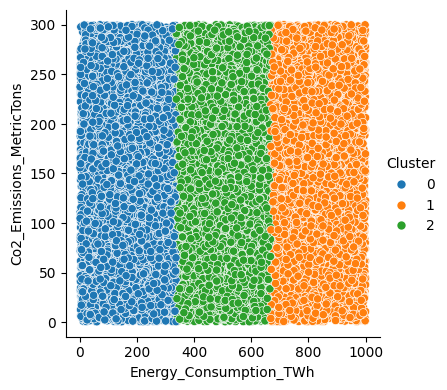

In [60]:
sns.relplot(
    x="Energy_Consumption_TWh", y="Co2_Emissions_MetricTons", hue="Cluster", data=X, height=4,
);

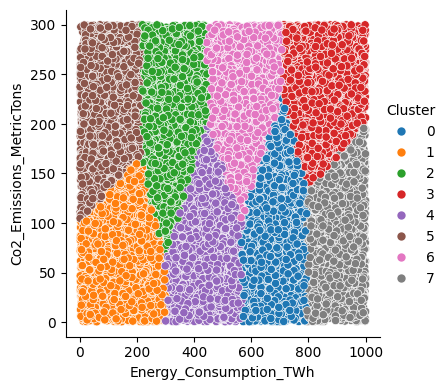

In [62]:
X = df.loc[:, ["Energy_Consumption_TWh", "Co2_Emissions_MetricTons"]]
X.head()

kmeans = KMeans(n_clusters=8)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

sns.relplot(
    x="Energy_Consumption_TWh", y="Co2_Emissions_MetricTons", hue="Cluster", data=X, height=4,
);

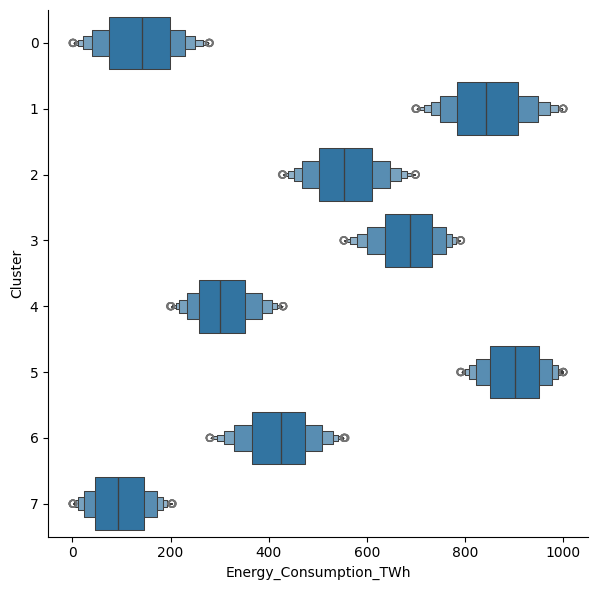

In [56]:
X["Energy_Consumption_TWh"] = df["Energy_Consumption_TWh"]
sns.catplot(x="Energy_Consumption_TWh", y="Cluster", data=X, kind="boxen", height=6);

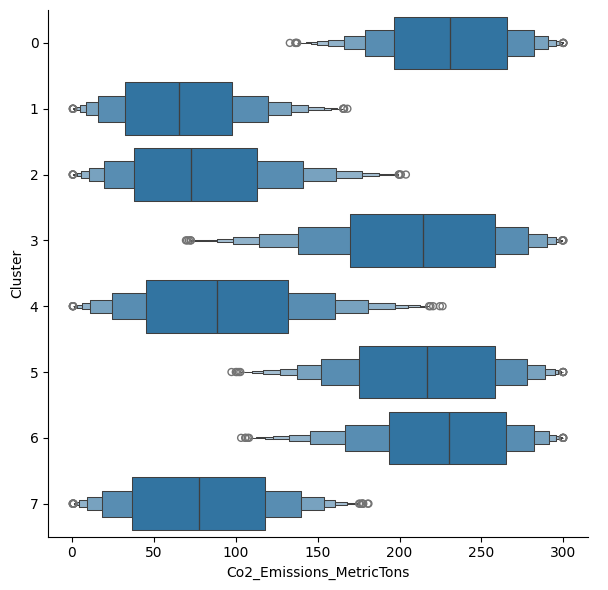

In [57]:
X["Co2_Emissions_MetricTons"] = df["Co2_Emissions_MetricTons"]
sns.catplot(x="Co2_Emissions_MetricTons", y="Cluster", data=X, kind="boxen", height=6);

In [64]:
features = [
       'Energy_Consumption_TWh',
       'Automobile_Co2_Emissions_MetricTons',
       'Industrial_Co2_Emissions_MetricTons',
       'Agriculture_Co2_Emissions_MetricTons',
       'Domestic_Co2_Emissions_MetricTons', 'Population_Millions',
       'GDP_Billion_USD', 'Urbanization_Percentage',
       'Renewable_Energy_Percentage', 'Industrial_Growth_Percentage',
       'Transport_Growth_Percentage'
]

print("Correlation with Co2_Emissions_MetricTons:\n")
print(df[features].corrwith(df.Co2_Emissions_MetricTons))

Correlation with Co2_Emissions_MetricTons:

Energy_Consumption_TWh                  0.011754
Automobile_Co2_Emissions_MetricTons    -0.009433
Industrial_Co2_Emissions_MetricTons     0.006888
Agriculture_Co2_Emissions_MetricTons   -0.008660
Domestic_Co2_Emissions_MetricTons       0.013756
Population_Millions                     0.013694
GDP_Billion_USD                         0.006703
Urbanization_Percentage                -0.008156
Renewable_Energy_Percentage             0.000248
Industrial_Growth_Percentage            0.007791
Transport_Growth_Percentage             0.006053
dtype: float64


In [70]:
def apply_pca(X, standardize=True):
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

X = df.copy()
y = X.pop("Co2_Emissions_MetricTons")
X = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X)
print(loadings)

                                           PC1       PC2       PC3       PC4  \
Energy_Consumption_TWh                0.007155  0.377693  0.253967  0.365279   
Automobile_Co2_Emissions_MetricTons   0.269507  0.066635 -0.121452 -0.586207   
Industrial_Co2_Emissions_MetricTons  -0.430793  0.341912 -0.201399 -0.049771   
Agriculture_Co2_Emissions_MetricTons -0.051649 -0.426366  0.004684 -0.118911   
Domestic_Co2_Emissions_MetricTons     0.389449  0.353365 -0.359551 -0.028735   
Population_Millions                   0.062022 -0.101753 -0.195523  0.654704   
GDP_Billion_USD                      -0.408698 -0.128830 -0.296892 -0.198040   
Urbanization_Percentage              -0.256491  0.592676  0.054488 -0.098872   
Renewable_Energy_Percentage           0.089796 -0.024488  0.721202 -0.096054   
Industrial_Growth_Percentage          0.490214  0.208141  0.050984 -0.073591   
Transport_Growth_Percentage           0.319925 -0.084917 -0.314348  0.114956   

                                       